## Bayesian Inference for a Proprtion


* Example: Tokyo Express customers' dining preference  
The owner wants to find out how popular is choice of Friday.


### Step 0: Import necesasry packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

### Step 1: Consider the percentage of customers' choice is Friday  
Before giving out the survey, let's consider the possible values and corresponding probablities of $p$

In [3]:
prior_values = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
prior_probs = np.array([0.125, 0.125, 0.250, 0.250, 0.125, 0.125])

Note that probabilities are reasonable due to **Axioms of Probability**  
1. For any event $A$, $P(A) \in [0, 1]$
2. $P(U)=1$
3. If $A_i$ and $A_j$ are disjoint, $P(A_i \cup A_j)=P(A_i)+P(A_j)$

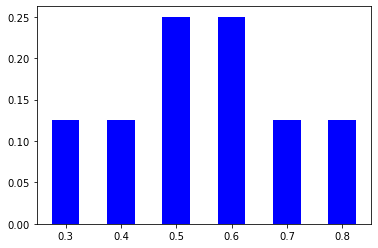

In [4]:

plt.bar(prior_values, prior_probs, color='blue', width=0.05)
plt.show()

### Step 2: Collect the data and Compute the likelihood of $p$  
Out of the 20 responses, 12 say that their favorite day for eating out for dinner is Friday.  
Quantitiy of interest: $p$, unknown, we're trying to make a inference about it!

In [5]:
n = 20
y = 12


* **The Binomial Distribution**  
1. One is repeating the same basic task $n$ times
2. 2 outcomes - *success* or *failure*
3. The probability of of *success* is always $p$
4. The results of outcomes from different trials are independent


Do you think that the survey is a Binomial Experiment?
1. 20 people
2. *success*: Choose Friday
3. For simplicity, let's assume that people answered independently

$$P(Y=k)={n \choose k}p^k(1-p)^{n-k}, k=0,...,n$$
* **Likelihood**  
a function of unknown quantity of interest. After collecting data, in this case,
$$L(p) = {20 \choose 12}p^k(1-p)^{n-k}$$
$Y:$ even though it is the random variable, but once we observed the data, it is now **fixed!**  

In Bayesian Inference, we assume that data is fixed and parameter is unknown. We only need $n, k$ and possible values of $p$ when computing the likelihood function. Note that we don't need $\pi_{\text{owner}}(p)$

In [6]:
likelihoods = binom.pmf(y, n, prior_values)

result = np.transpose(np.array([prior_values, prior_probs, likelihoods]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood'])
print(df)

     p  prior  likelihood
0  0.3  0.125    0.003859
1  0.4  0.125    0.035497
2  0.5  0.250    0.120134
3  0.6  0.250    0.179706
4  0.7  0.125    0.114397
5  0.8  0.125    0.022161


### Step 3: Compute posterior distribution

$$\pi(p_i|y)=\frac{\pi(p_i) \times L(p)}{\sum_{j}{\pi(p_j) \times L(p_j)}}$$

In [7]:
products = likelihoods * prior_probs
sum_p = np.sum(products)
posterior_probs = products / sum_p

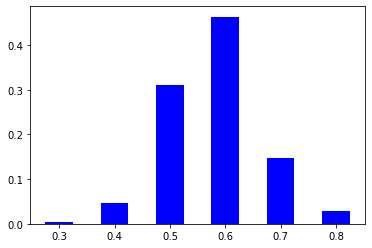

In [8]:
plt.bar(prior_values, posterior_probs, color='blue', width=0.05)
plt.show()

In [9]:
likelihoods = binom.pmf(y, n, prior_values)
result = np.transpose(np.array([prior_values, prior_probs, likelihoods, products, posterior_probs]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood', 'product', 'posterior'])
print(df)

     p  prior  likelihood   product  posterior
0  0.3  0.125    0.003859  0.000482   0.004976
1  0.4  0.125    0.035497  0.004437   0.045768
2  0.5  0.250    0.120134  0.030034   0.309786
3  0.6  0.250    0.179706  0.044926   0.463401
4  0.7  0.125    0.114397  0.014300   0.147496
5  0.8  0.125    0.022161  0.002770   0.028573


## Continuous prios - the Beta distribution

\* *From [wikipedia](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference)*  

The Bayesian inference, the beta distribution is the **conjugate prior probability distribution** for the **Bernoulli**, **binomial**, **negative binomial** and **geometric distributions**. It is a suitable model for the random behavior of percentage and proportions.

---
The prior and posterior are called **conjugate distributions** if those are in the same distribution family, and such prior is called **conjugate prior**.

* Advantages:
1. Closed-form expression (algebraic expression). Without conjugate prior, numerical integral may be necessary
2. Conjugate prior may give some intuition such as how likelihood funcion updates a prior distribution
---

For $0 \leq x \leq 1, \alpha, \beta > 0$

$$f(x;\alpha,\beta)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1} $$

### Properties
1. **Mode**: The most likely value of the distribution  
If $\alpha, \beta>1$, 
$$\frac{\alpha-1}{\alpha+\beta-2}$$  
If not, it indicates **anti-mode**, the lowest point of the pdf  

2. **Mean(Expectation)**:
$$\frac{\alpha}{\alpha+\beta}$$
3. **Variance**:
$$\text{var}(X)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

### Bayesian Inference
* $a, b$ represents how many **prior successes / failures** you think that there should be
* $a+b$ shows how strong the prior assumption is.

### Examples of Beta Curves

In [104]:
def draw_beta(a, b):
    x = np.linspace(beta.ppf(0.00001, a, b), beta.ppf(0.99999, a, b), 100)
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    plt.plot(x, beta.pdf(x, a, b), lw=3)
    plt.title(f'Beta({a},{b})')
    plt.show()
    

In [78]:
beta_params = np.array([[(0.5, 0.5), (0.5, 1), (0.5, 2)], 
                        [(1, 0.5), (1, 1), (1, 2)],
                        [(4,0.5), (4,1), (4,2)]], 
                       )

(3, 3, 2)


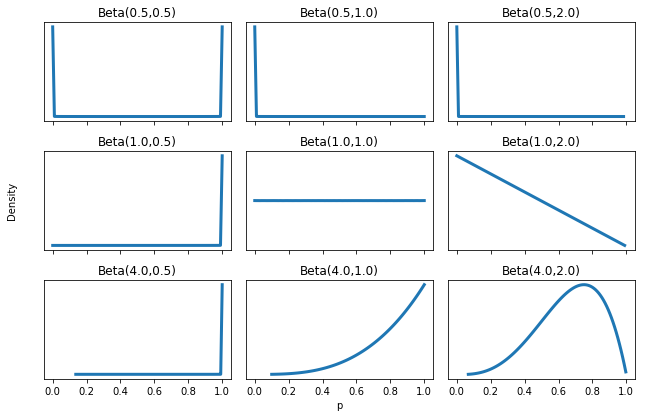

In [79]:
print(beta_params.shape)

len_x, len_y, _ = beta_params.shape
fig, axs = plt.subplots(len_x, len_y, sharex = True, figsize=(9,6))
fig.add_subplot(111, frameon=False)
for i, j in np.ndindex((len_x, len_y)):
    a, b = beta_params[i, j]
    # returns evenly spaced numbers over a specificed interval
    x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
    axs[i, j].plot(x, beta.pdf(x, a, b), lw=3)
    axs[i, j].set_title(f'Beta({a},{b})')
    axs[i, j].get_yaxis().set_visible(False)

fig.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('p')
plt.ylabel('Density')
plt.show()

### How to choose a Beta curve to represent prior opinions?

* Specify a Beta prior by specification of quantiles of the distribution  

*quantile:* are about rank order of values. ex) middle quantile = medium

In [105]:
def beta_select(quantile1, quantile2):
    def betaprior1(K, x, p):
        EPS = 0.0001
        lo = 0.0, hi = 1.0, flag = False
        while (flag == False):
            mid = (lo + hi) / 2.0
            p0 = beta.cdf(x, K * mid, K * (1 - mid))
            if (p0 < p):
                hi = mid
            else:
                lo = mid
            if abs(p0 = p) < EPS):
                flag = True
        return mid
    
    p1 = quantile1['p'], x1 = quantile1['x']
    p2 = quantile2['p'], x2 = quantile2['x']
    
    logK = np.linspace(-3, 8, num=100)
    K = np.exp(logK) # sum of two shape parameters (sample size)
    mids = betaprior1(K, x1, p1)
    
    prob2 = beta.cdf(x2, K * mids, K * (1 - mids))
    
    #
    
    return np.round(K * m0, 
    
    

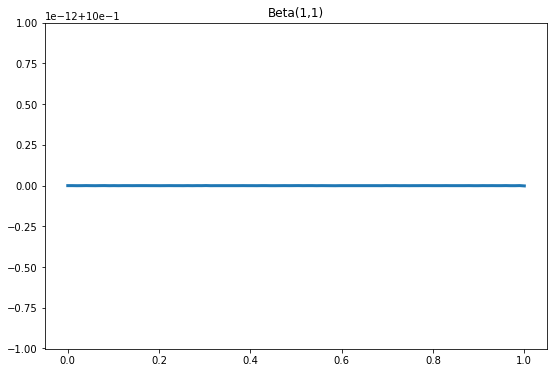

In [106]:
draw_beta(1, 1)